In [129]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Assume we have a likelihood model for state-dependent action, with a latent variable $k$. 
This model gives us a probability $ \Pr(a \mid s, k) $.
Rather than fitting one value of $k$, we would like to fit a distribution over values of $k$.
This corresponds to an assumption that a single person can make decisions using different $k$ values at different times.
For example, we might assume that $k$ is drawn from a Geometric distribution.
This distribution has one parameter, $p$. Thus, we now perform inference over $p$, marginalizing out $k$.
That is, we compute

$$
\Pr(a \mid s, p) = \sum_k \Pr(a \mid s, k) \text{Geom}(k; p)
$$

In [130]:
# Model defines these two functions. These are dummy examples.

def k_likelihood(k, state, action):
    """p(action | state, k)"""
    # DUMMY
    return np.exp(-abs(k - 3))

def is_optimal(k, state):
    """Returns True if the k-agent acts optimally in the given state."""
    # DUMMY
    return k >= 4

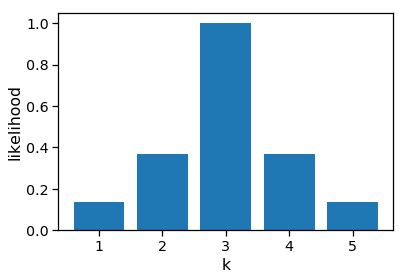

In [131]:
k = np.arange(1,6)
plt.bar(k, k_likelihood(k, None, None))
plt.xlabel('k')
plt.ylabel('likelihood');

In [132]:
from scipy.stats.distributions import geom

def geom_k_likelihood(p, state, action):
    """p(action | state, p) integrating out k ~ Geom(p)"""
    # We can treat all k that result in the same (optimal) action distribution
    # as one bin. max_k is the first k such that this k and all larger k result
    # in optimal action distributions. We then put the probability mass of all those
    # larger k that we don't explicitly consider onto the max_k bin.
    max_k = next(k for k in range(100, 0, -1) if not is_optimal(k, state)) + 1
    k = np.arange(1, max_k+1)
    pk = geom(p).pmf(k)
    pk[-1] = 1 - pk[:-1].sum()  # tail probability of all k >= max_k
    lk = k_likelihood(k, state, action)  # assumes k_likelihood can take vector k
    return (pk * lk).sum()

Text(0, 0.5, 'likelihood')

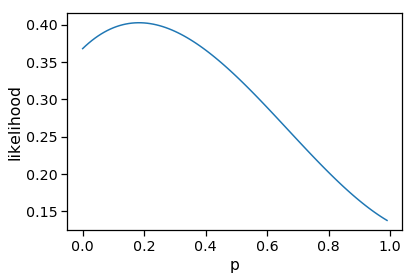

In [135]:
ps = np.arange(0, 1, 0.01)
plt.plot(ps, [geom_k_likelihood(p, None, None) for p in ps])
plt.xlabel('p')
plt.ylabel('likelihood')